### EDA for Journal Entry Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### Load Dataset

In [13]:
df = pd.read_csv('../data/synthetic_versions/synthetic_labeled_v1.csv')
df.head()

,amount,vendor,account,posting_date,user_id,description,label
0,1487.30,Vendor_10,HR,2023-05-14,1079,Regular business transaction,0
1,816.47,Vendor_1,Sales,2023-05-10,1076,Regular business transaction,0
2,1474.83,Vendor_19,Finance,2023-09-12,1018,Regular business transaction,0
3,686.46,Vendor_12,Finance,2023-06-06,1029,Regular business transaction,0
4,1257.45,Vendor_10,Marketing,2023-12-19,1086,Regular business transaction,0


### Summary Statistics

In [6]:
df.describe(include='all')

,amount,vendor,account,posting_date,user_id,description,label
count,1000.00000,1000,1000,1000,1000.000000,1000,1000.000000
unique,NaN,20,7,337,NaN,2,NaN
top,NaN,Vendor_1,Legal,2023-02-23,NaN,Regular business transaction,NaN
freq,NaN,59,155,9,NaN,950,NaN
mean,1231.67585,NaN,NaN,NaN,1049.695000,NaN,0.050000
std,1819.04106,NaN,NaN,NaN,28.422875,NaN,0.218054
min,45.36000,NaN,NaN,NaN,1000.000000,NaN,0.000000
25%,815.80000,NaN,NaN,NaN,1025.000000,NaN,0.000000
50%,1006.27000,NaN,NaN,NaN,1050.000000,NaN,0.000000
75%,1219.96000,NaN,NaN,NaN,1075.000000,NaN,0.000000


### Missing Values

In [7]:
df.isnull().sum()

amount          0
vendor          0
account         0
posting_date    0
user_id         0
description     0
label           0
dtype: int64

### Distribution of Transaction Amount

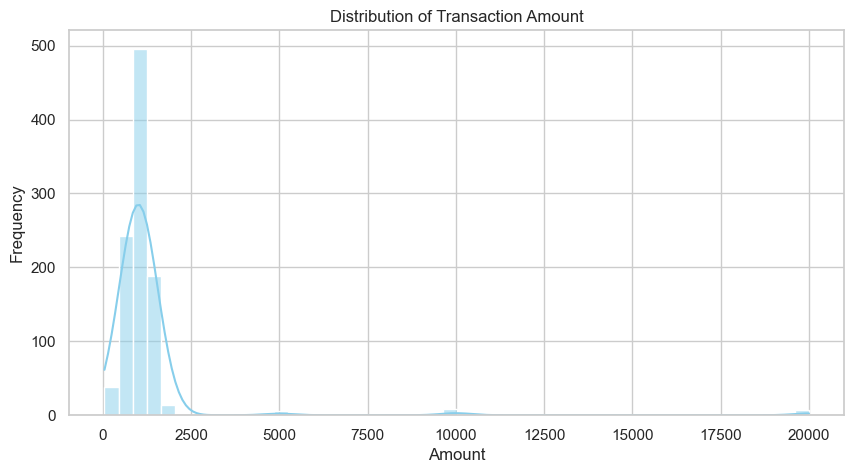

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### Anomaly Label Distribution

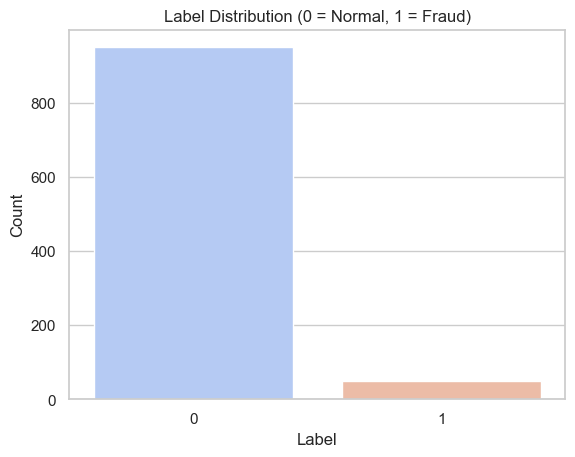

In [17]:
if 'label' in df.columns:
    sns.countplot(x='label', data=df, hue='label', palette='coolwarm', legend=False)
    plt.title('Label Distribution (0 = Normal, 1 = Fraud)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
else:
    print('Label column not found.')

### Temporal Patterns (Day of Week)

'day_of_week' column created from 'posting_date'


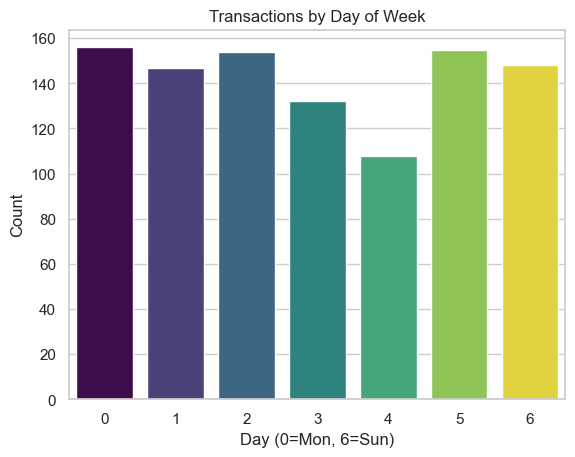

In [16]:
# Derive 'day_of_week' if date column exists
if 'date' in df.columns or 'posting_date' in df.columns:
    date_col = 'date' if 'date' in df.columns else 'posting_date'
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['day_of_week'] = df[date_col].dt.dayofweek
    print(f"'day_of_week' column created from '{date_col}'")
else:
    print("No date column found to extract 'day_of_week'")
sns.countplot(x='day_of_week', data=df, hue='day_of_week', palette='viridis', legend=False)
plt.title('Transactions by Day of Week')
plt.xlabel('Day (0=Mon, 6=Sun)')
plt.ylabel('Count')
plt.show()

### Frequent Vendors / Accounts

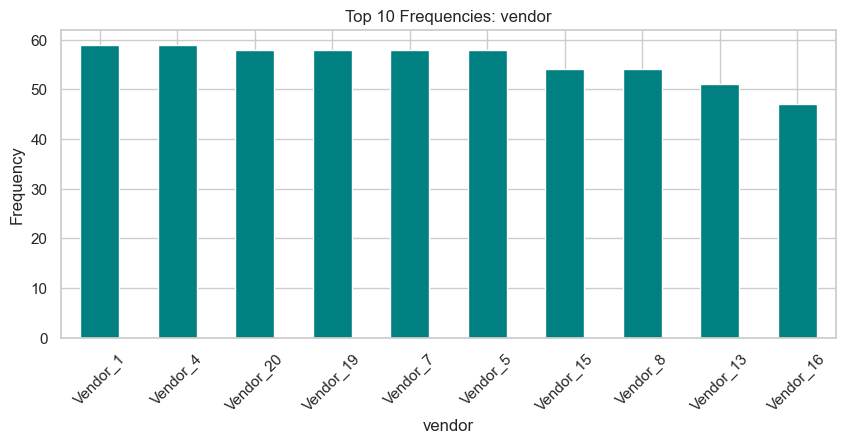

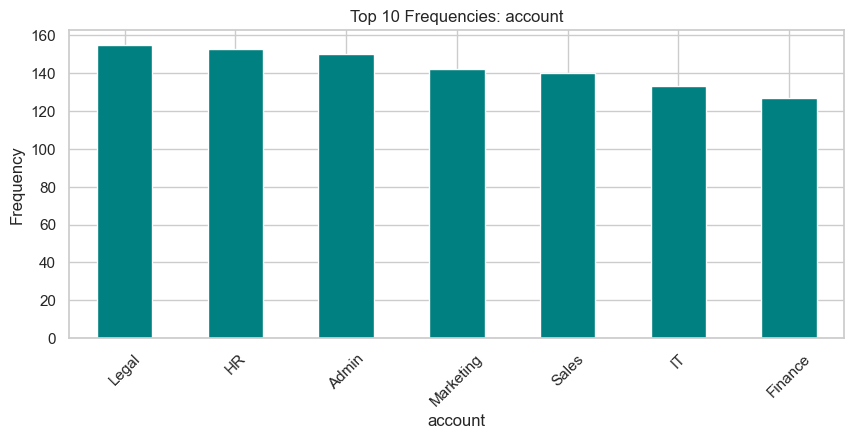

In [12]:
for col in df.columns:
    if 'vendor' in col.lower() or 'account' in col.lower():
        df[col].value_counts().head(10).plot(kind='bar', figsize=(10, 4), color='teal')
        plt.title(f'Top 10 Frequencies: {col}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()